# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [75]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [84]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
# TIMING FUNCTIONS

import timeit


def fileToData(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            data += (line.split())
    return data


def timeInsert(dataIn, set):
    timesIn = []
    numElemIn = []
    for (i, v) in enumerate(dataIn):
        timesIn.append(timeit.timeit(lambda: set.insertElement(v), number=1))
        numElemIn.append(i)
    totalTime = sum(timesIn)
    print('Total Time taken to insert for'+set.__class__.__name__)
    print(totalTime)
    return totalTime

def timeSearch(dataOut, set):
    timesOut = []
    numElemOut = []
    for (i, v) in enumerate(dataOut):
        timesOut.append(timeit.timeit(lambda: set.searchElement(v), number=1))
        numElemOut.append(i)
    totalTime = sum(timesOut)
    print('Total Time taken to search for'+set.__class__.__name__)
    print(totalTime)
    return totalTime


## Auxilery data Structures
class SSNode:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class bstNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class AVLNode:

    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        self.height = 1


Use the cell below to implement the requested API by means of **sequential search**.

In [77]:

# List link implementation
class SequentialSearchSet(AbstractSet):

    def __init__(self):
        self.head = None

    def insertElement(self, element):
        # Add node as head if list is empty
        if self.head is None:
            self.head = SSNode(element)

        # Checks for duplicates
        current = self.head
        while current.next is not None:
            if current.data == element:
                return
            current = current.next

        # Add new node
        if current.data != element:
            current.next = SSNode(element)
            return True
        else:
            return False

    def searchElement(self, element):
        current = self.head
        while current is not None:
            if current.data == element:
                return True
            current = current.next
        return False


Use the cell below to implement the requested API by means of **binary search tree**.

In [78]:
class BinarySearchTreeSet(AbstractSet):

    def __init__(self):
        self.root = None

    def insertElement(self, element):
        inserted = False
        
        # if tree is empty to begin with
        if self.root is None:
            self.root = bstNode(element)
            inserted = True

        current_node = self.root
        while current_node:
            # if element equals the current node, do not add
            if element == current_node.value:
                break
            # if element is smaller than the current node
            elif element < current_node.value:
                # check if current node is a leaf. if not, rerun the process on the child node
                if current_node.left is None:
                    current_node.left = bstNode(element)
                    inserted = True
                else:
                    current_node = current_node.left
            # if element is bigger than the current node
            else:
                if current_node.right is None:
                    current_node.right = bstNode(element)
                    inserted = True
                else:
                    current_node = current_node.right
        return inserted

    def searchElement(self, element):
        found = False
        current_node = self.root
        # go through the tree according to the element
        while current_node:
            if element == current_node.value:
                found = True
                break
            elif element < current_node.value:
                current_node = current_node.left
            else:
                current_node = current_node.right
        return found

Use the cell below to implement the requested API by means of **balanced search tree**.

In [79]:

class BalancedSearchTreeSet(AbstractSet):

    def __init__(self):
        self.root = None

    def insertElement(self, val):
        if self.root is None:
            self.root = AVLNode(val)

        currentNode = self.root
        while currentNode is not None:
            if val < currentNode.val:
                if currentNode.left is None:
                    currentNode.left = AVLNode(val)
                    break
                currentNode = currentNode.left
            elif val > currentNode.val:
                if currentNode.right is None:
                    currentNode.right = AVLNode(val)
                    break
                currentNode = currentNode.right
            else:
                return False  # value already exists in tree

        self.updateHeight(currentNode)
        self.balanceTree(currentNode)
        return True

    def updateHeight(self, node):
        if node is None:
            return
        node.height = 1 + max(self.getHeight(node.left),
                              self.getHeight(node.right))

    def getHeight(self, node):
        if node is None:
            return 0
        return node.height

    def balanceTree(self, node):
        if node is None:
            return
        balance = self.getBalance(node)
        if balance > 1:
            if self.getBalance(node.left) < 0:
                self.rotateLeft(node.left)
            self.rotateRight(node)
        elif balance < -1:
            if self.getBalance(node.right) > 0:
                self.rotateRight(node.right)
            self.rotateLeft(node)

    def getBalance(self, node):
        if node is None:
            return 0
        return self.getHeight(node.left) - self.getHeight(node.right)

    def rotateRight(self, node):
        temp = node.left
        tempRight = temp.right
        temp.right = node
        node.left = tempRight
        self.updateHeight(node)
        self.updateHeight(temp)
        return temp


    def rotateLeft(self, node):
        temp = node.right
        tempLeft = temp.left
        temp.left = node
        node.right = tempLeft
        self.updateHeight(node)
        self.updateHeight(temp)
        return temp

    def printTree(self):
        if self.root is None:
            return
        self.printNode(self.root)

    def printNode(self, node):
        if node is None:
            return
        self.printNode(node.left)
        print(node.val)
        self.printNode(node.right)

    def searchElement(self, val):
        currentNode = self.root
        while currentNode is not None:
            if val < currentNode.val:
                currentNode = currentNode.left
            elif val > currentNode.val:
                currentNode = currentNode.right
            else:
                return True
        return False

    def __repr__(self):
        return self.printTree()


Use the cell below to implement the requested API by means of **bloom filter**.

In [92]:
class BloomFilterSet(AbstractSet):
    def __init__(self):
        """
        Bloom filter properties:
        k number of hashfunctions , depends on ε false error rate
        m is proportional to k and to number of elements to be added to bitmap
        k=m/n * ln2 , m required number of bits and n is number of elements
        m= -nlog(base2 ,ε)/ln2
        k=-log2ε
        for times table using real data:
          self.size = 56774477
          numOfElements =5923227
          k=7
          https://hur.st/bloomfilter/?n=5923227&p=0.01&m=&k=
          website used to calculate the number of hash functions and size of the bitfield for real data
        """
        self.numOfElements = 10_000
        self.size = 55_000
        self.bitfield = [False] * self.size
        self.numberOfHashFunctions = 7
        self.name = "Bloom Filter"

    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        indexes = self.generateIndexes(element)
        for i in indexes:
            self.bitfield[i] = True
        return inserted

    def searchElement(self, element):
        found = False
        # ADD YOUR CODE HERE
        indexes = self.generateIndexes(element)
        for i in indexes:
            # if any of the indexes is false then the element is not in the set
            if not self.bitfield[i]:
                return False
        return True

    def fnv_1a_str(self, s, seed=0):
        """
            FNV website: http://www.isthe.com/chongo/tech/comp/fnv/index.html
            Wikipedia contributors. (2022, January 16). FNV. In Wikipedia,
            https://en.wikipedia.org/wiki/Fowler%E2%80%93Noll%E2%80%93Vo_hash_function#FNV-1a_hash
        """
        FNV_OFFSET_BASIS = 14695981039346656037
        FNV_PRIME = 1099511628211
        hash_val = seed ^ FNV_OFFSET_BASIS
        for c in s:
            hash_val = (hash_val ^ ord(c)) * FNV_PRIME
        return hash_val

    def rabin_karp_hash(self, s, p=31, m=10 ** 9 + 9):
        """
            Rabin-Karp hash function implementation using a prime number as the base of the polynomial function.
            Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms (3rd ed.). The MIT Press. Section 32.1.
            Wikipedia contributors. (2022, January 11). Rabin-Karp algorithm. In Wikipedia, The Free Encyclopedia.
            https://en.wikipedia.org/wiki/Rabin%E2%80%93Karp_algorithm
            GeeksforGeeks contributors. (2022, January 15). Rabin-Karp Algorithm for Pattern Searching.
            https://www.geeksforgeeks.org/rabin-karp-algorithm-for-pattern-searching/
        """
        n = len(s)
        power_p = 1
        hash_val = 0
        for i in range(n):
            hash_val = (hash_val + (ord(s[i]) - ord('a') + 1) * power_p) % m
            power_p = (power_p * p) % m

        return hash_val

    def generateIndexes(self, elem):
        h = hash(elem)
        fnv1a = self.fnv_1a_str(elem)
        rkh = self.rabin_karp_hash(elem)
        indexes = [h % self.size,
                   fnv1a % self.size,
                   rkh % self.size,
                   (h + hash(h)) % self.size]

        return indexes
        """
                    Extra Functions used for testing on real data
                   (fnv1a + h) % self.size,
                    (rkh + h) % self.size]
                   (rkh + fnv1a) % self.size
                   ]
        https://www.eecs.harvard.edu/~michaelm/postscripts/tr-02-05.pdf
        generating 4 extra hash functions using fnv1a , rabin karp and python hash
        we store the inital 3 hash values to reduce calculation time
        """


Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [81]:
import string
import random


class TestDataGenerator(AbstractTestDataGenerator):

    def __init__(self):
        # ADD YOUR CODE HERE
        pass

    def generateString(self):
        letters = string.printable
        result_str = ''.join(random.choice(letters)
                             for i in range(random.randint(1, 10)))
        return result_str

    def generateFixedLengthString(self, strlen):
        letters = string.printable
        return (''.join(random.choice(letters) for i in range(strlen)))

    def generateData(self, size):
        # ADD YOUR CODE HERE
        data = [self.generateString() for _ in range(size)]
        return data

    def generateFixedLenData(self, strlen, size):
        return [self.generateFixedLengthString(strlen) for _ in range(size)]

    def generateInputDataAndElementNotInData(self, size):
      data = self.generateData(size)
      element = self.generateString()
      while element in data:
          element = self.generateString()
      return data, element

    def generateSortedData(self, size):
      return sorted(self.generateData(size))



Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [85]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA

## NOTE THAT BLOOM FILTER USES DIFFERENT PARAMETERS FOR REAL DATA 
## as mentioned in the implementation of the BloomFilterSet class
ss1 = SequentialSearchSet()
bst1 = BinarySearchTreeSet()
avl1 = BalancedSearchTreeSet()
bf1 = BloomFilterSet()

ss2 = SequentialSearchSet()
bst2 = BinarySearchTreeSet()
avl2 = BalancedSearchTreeSet()
bf2 = BloomFilterSet()

ss3 = SequentialSearchSet()
bst3 = BinarySearchTreeSet()
avl3 = BalancedSearchTreeSet()
bf3 = BloomFilterSet()

data_inMobydick = fileToData("test1-mobydick.txt")
data_inWarPeace = fileToData("test2-warpeace.txt")
data_inDickens = fileToData("test3-dickens.txt")
data_search = fileToData("test-search.txt")

#INSERT
#Mobydick
timeInsert(data_inMobydick, ss1)
timeInsert(data_inMobydick, bst1)
timeInsert(data_inMobydick, avl1)
timeInsert(data_inMobydick, bf1)

#War and Peace
timeInsert(data_inWarPeace, ss2)
timeInsert(data_inWarPeace, bst2)
timeInsert(data_inWarPeace, avl2)
timeInsert(data_inWarPeace, bf2)

#Dickens
timeInsert(data_inDickens, ss3)
timeInsert(data_inDickens, bst3)
timeInsert(data_inDickens, avl3)
timeInsert(data_inDickens, bf3)

#SEARCH
#Mobydick

timeSearch(data_search, ss1)
timeSearch(data_search, bst1)
timeSearch(data_search, avl1)
timeSearch(data_search, bf1)

#War and Peace

timeSearch(data_search, ss2)
timeSearch(data_search, bst2)
timeSearch(data_search, avl2)
timeSearch(data_search, bf2)

#Dickens

timeSearch(data_search, ss3)
timeSearch(data_search, bst3)
timeSearch(data_search, avl3)
timeSearch(data_search, bf3)





Total Time taken to insert forBinarySearchTreeSet
0.6526091997620824
Total Time taken to insert forBalancedSearchTreeSet
0.6911473998807196
Total Time taken to insert forBloomFilterSet
0.9906800999933694
Total Time taken to insert forBinarySearchTreeSet
1.4965929994305043
Total Time taken to insert forBalancedSearchTreeSet
1.7248847997634584
Total Time taken to insert forBloomFilterSet
2.754915600530694
Total Time taken to insert forBinarySearchTreeSet
18.04948959964895
Total Time taken to insert forBalancedSearchTreeSet
18.57982279911448
Total Time taken to insert forBloomFilterSet
24.121850099523726
Total Time taken to search forBinarySearchTreeSet
0.0017541000233904924
Total Time taken to search forBalancedSearchTreeSet
0.0015920000059850281
Total Time taken to search forBloomFilterSet
0.0026870000274357153
Total Time taken to search forBinarySearchTreeSet
0.001607700003660284
Total Time taken to search forBalancedSearchTreeSet
0.0016404000070906477
Total Time taken to search forBlo

0.002626600018629688

In [90]:
bf1 = BloomFilterSet()
bf2 = BloomFilterSet()
bf3 = BloomFilterSet()
timeInsert(data_inMobydick, bf1)
timeInsert(data_inWarPeace, bf2)
timeInsert(data_inDickens, bf3)
timeSearch(data_search, bf1)
timeSearch(data_search, bf2)
timeSearch(data_search, bf3)


Total Time taken to insert forBloomFilterSet
1.3007799998285918
Total Time taken to insert forBloomFilterSet
3.4379594002184604
Total Time taken to insert forBloomFilterSet
30.736855598597685
Total Time taken to search forBloomFilterSet
0.003685300000142888
Total Time taken to search forBloomFilterSet
0.00400889997217746
Total Time taken to search forBloomFilterSet
0.0035998000057588797


0.0035998000057588797

In [ ]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA
TestDataGen = TestDataGenerator()
synthetic_data_in = TestDataGen.generateData(1000)
SS_synthetic_insert = SequentialSearchSet()
timeInsert(synthetic_data_in, SS_synthetic_insert)


SS_synthetic_search = SequentialSearchSet()
# GENERATE SINGLE ELEMENT FOR BEST AND WORST CASE

# Best case
best_data_out = synthetic_data_in[0]

# Worst case
worst_data_out = TestDataGen.generateData(1)

# INSERT DATASET TO BE SEARCHED
for word in synthetic_data_in:
    SS_synthetic_search.insertElement(word)

# best case
print('Best case SS')
print(timeit.timeit(lambda: SS_synthetic_search.searchElement(best_data_out)))

# worst case
print('Worst case SS')
print(timeit.timeit(lambda: SS_synthetic_search.searchElement(worst_data_out)))

##Best case BST
bstBest = BinarySearchTreeSet()
T = TestDataGenerator()
dataInsert = T.generateData(1_000)
rootElem = dataInsert[0]
for d in dataInsert:
    bstBest.insertElement(d)
print('Best case BST',timeit.timeit(lambda: bstBest.searchElement(rootElem)))

##Best case AVL
avlBest = BalancedSearchTreeSet()
T = TestDataGenerator()
dataInsert = T.generateData(1_000)
rootElem = dataInsert[0]
for d in dataInsert:
    avlBest.insertElement(d)
print('Best case  AVL',timeit.timeit(lambda: avlBest.searchElement(rootElem)))

## EDGE CASE TESTING FOR BST VS AVL
# Large data set
T = TestDataGenerator()
dataToTest = T.generateData(20_000_000)
dataToTestSearch = T.generateData(500)+dataToTest[:500]
random.shuffle(dataToTest)
avlLarge = BalancedSearchTreeSet()
bstLarge = BinarySearchTreeSet()
timeInsert(dataToTest, avlLarge)
timeInsert(dataToTest, bstLarge)
timeSearch(dataToTestSearch, avlLarge)
timeSearch(dataToTestSearch, bstLarge)

##Testing element not in set
bstMissingElement = BinarySearchTreeSet()
avlMissingElement = BalancedSearchTreeSet()
dataToInsert, elemNotInTree = TestDataGenerator().generateInputDataAndElementNotInData(10_000)
for v in dataToInsert:
    bstMissingElement.insertElement(v)
    avlMissingElement.insertElement(v)

print('BST missing element')
print(timeit.timeit(lambda: bstMissingElement.searchElement(elemNotInTree), number=1))

print('AVL missing element')
print(timeit.timeit(lambda: avlMissingElement.searchElement(elemNotInTree), number=1))

##Inserting sorted list
bstSorted = BinarySearchTreeSet()
avlSorted = BalancedSearchTreeSet()
dataToInsert = TestDataGenerator().generateSortedData(1_000)
timeInsert(dataToInsert, bstSorted)
timeInsert(dataToInsert, avlSorted)

##Bloom filter Testing
# this code was run multiple times with different values of m and was used to plot figure 9
# automated using xlsxwriter
bfFig9 = BloomFilterSet()
totalData = data_inMobydick + data_inWarPeace + data_inDickens
dataSearch = data_search
timeInsert(totalData, bfFig9)
timeSearch(dataSearch, bfFig9)

# this code was run multiple times with different values of m and k and used to plot figure 10
# automated using xlsxwriter 

bfFalsePos = BloomFilterSet()
falsePositives = 0
dataInsert = TestDataGenerator().generateFixedLenData(5, 10_000)
dataSearch = TestDataGenerator().generateFixedLenData(5, 1_000)  # same lengths, some data will be the same

# using pythons set for testing whether search element is in insert list is quicker
setInsert = set(dataInsert)
for d in dataInsert:
    bfFalsePos.insertElement(d)

for elemSearch in dataSearch:
    result = bfFalsePos.searchElement(elemSearch)
    if result and (elemSearch not in setInsert):
        falsePositives += 1
falsePositiveRate = falsePositives/len(dataSearch)
print(falsePositiveRate)



## Extra Data Structures Used for Comparison

In [ ]:
# LLRB CODE -
# Helper functions for LLRB

# Used to correct violations of the LLRB Tree properties using rotation helper functions


def correct_insert(self, node_to_insert):
    while node_to_insert != self.root and node_to_insert.parent.red:
        if node_to_insert.parent == node_to_insert.parent.parent.right:
            uncle = node_to_insert.parent.parent.left  # uncle
            if uncle.red:
                uncle.red = False
                node_to_insert.parent.red = False
                node_to_insert.parent.parent.red = True
                node_to_insert = node_to_insert.parent.parent
            else:
                if node_to_insert == node_to_insert.parent.left:
                    node_to_insert = node_to_insert.parent
                    rotate_right(self, node_to_insert)
                node_to_insert.parent.red = False
                node_to_insert.parent.parent.red = True
                rotate_left(self, node_to_insert.parent.parent)
        else:
            uncle = node_to_insert.parent.parent.right  # uncle

            if uncle.red:
                uncle.red = False
                node_to_insert.parent.red = False
                node_to_insert.parent.parent.red = True
                node_to_insert = node_to_insert.parent.parent
            else:
                if node_to_insert == node_to_insert.parent.right:
                    node_to_insert = node_to_insert.parent
                    rotate_left(self, node_to_insert)
                node_to_insert.parent.red = False
                node_to_insert.parent.parent.red = True
                rotate_right(self, node_to_insert.parent.parent)
    self.root.red = False


def rotate_left(self, node):
    node2 = node.right
    node.right = node2.left
    if node2.left != self.nil:
        node2.left.parent = node

    node2.parent = node.parent
    if node.parent == None:
        self.root = node2
    elif node == node.parent.left:
        node.parent.left = node2
    else:
        node.parent.right = node2
    node2.left = node
    node.parent = node2

# rotate right at node


def rotate_right(self, node):
    node2 = node.left
    node.left = node2.right
    if node2.right != self.nil:
        node2.right.parent = node

    node2.parent = node.parent
    if node.parent == None:
        self.root = node2
    elif node == node.parent.right:
        node.parent.right = node2
    else:
        node.parent.left = node2
    node2.right = node
    node.parent = node2


class Node:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None


class llrbTree(AbstractSet):

    def __init__(self):
        # ADD YOUR CODE HERE
        self.nil = Node(None)
        self.nil.red = False
        self.nil.left = None
        self.nil.right = None
#         self.root = None
        self.root = self.nil

        pass

    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        node_to_insert = Node(element)
        node_to_insert.parent = None
        node_to_insert.left = self.nil
        node_to_insert.right = self.nil
        node_to_insert.red = True
        parent = None
        current = self.root
        while current != self.nil:
            parent = current
            if node_to_insert.val < current.val:
                current = current.left
            elif node_to_insert.val > current.val:
                current = current.right
            else:
                inserted = False
                return inserted

        node_to_insert.parent = parent
        if parent == None:
            self.root = node_to_insert
            inserted = True
        elif node_to_insert.val < parent.val:
            parent.left = node_to_insert
            inserted = True
        elif node_to_insert.val > parent.val:
            parent.right = node_to_insert
            inserted = True

        correct_insert(self, node_to_insert)
        return inserted

    def searchElement(self, element):
        found = False
        current_node = self.root
        while current_node is not None:
            if str(element) == str(current_node.val):
                found = True
            elif str(element) < str(current_node.val):
                current_node = current_node.left
            else:
                current_node = current_node.right
        return found


In [ ]:
#Circular Linked List Implementation
# Circular Linked List Implementation
class CircularNode:
    def __init__(self, data):
        self.data = data
        self.next = None


class CLLSequentialSearchSet(AbstractSet):
    def __init__(self):
        self.last = None

    def insertElement(self, element):
        # Initiate self.last as new node is list is empty
        if self.last == None:
            newNode = CircularNode(element)
            self.last = newNode
            newNode.next = newNode
        else:
            # Check if element is already in list
            p = self.last.next
            while p != self.last:
                if p.data == element:
                    return
                p = p.next
            if self.last.data == element:
                return
            # Add new element to end of the list
            newNode = CircularNode(element)
            newNode.next = self.last.next
            self.last.next = newNode

    def searchElement(self, element):
        temp = self.last
        # If the list is empty, the element cannot be found
        if self.last == None:
            return False
        while True:
            if temp.data == element:
                return True
            temp = temp.next
            if temp == self.last:
                break
        return False


# Linked List Implementation
class LLNode:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class LLSequentialSearchSet(AbstractSet):
    def __init__(self):
        self.head = None

    def insertElement(self, element):
        if self.head is None:
            self.head = LLNode(element)

        current = self.head
        while current.next is not None:
            if current.data == element:
                return
            current = current.next

        if current.data != element:
            current.next = LLNode(element)
            return True
        else:
            return False

    def searchElement(self, element):
        current = self.head
        while current is not None:
            if current.data == element:
                return True
            current = current.next
        return False


### Plotting the graphs and figures


## Auxilery Functions used to plot graphs includes matplotlib import

In [ ]:
import matplotlib.pyplot as plt


def plotInsert(dataIn, set, window_size=5):
    timesIn = []
    numElemIn = [i for i in range(len(dataIn))]
    moving_avg = []  # stores moving averages
    for i in range(len(dataIn)):
        for eIn in dataIn[:i]:  # insert i-1 elements
            set.insertElement(eIn)
        # time taken to insert ith element
        timesIn.append(timeit.timeit(
            lambda: set.insertElement(dataIn[i]), number=1))
        # calculates moving average by taking average of previous window_size insertion times, or all the insertion times if there is less than window_size
        if len(timesIn) >= window_size:
            moving_avg.append(sum(timesIn[-window_size:]) / window_size)
        else:
            moving_avg.append(sum(timesIn) / len(timesIn))
    # plot everything and initialise graph
    plt.plot(numElemIn, moving_avg)
    plt.xlabel('Number of elements in BST')
    plt.ylabel('Time')
    plt.title(
        f'Time taken to insert elements in the Set (moving avg window size: {window_size})')
    plt.show()

# plotting searching time vs time


def plotSearch(dataIn, dataOut, set, window_size=5):
    numElemOut = [i for i in range(len(dataIn))]
    avgTimesOut = []
    moving_avg = []
    for i in range(len(dataIn)):
        # insert data up to ith element
        for elemIn in dataIn[i]:
            set.insertElement(elemIn)
        # search for elements in dataOut
        timesOut = []
        for elemOut in dataOut:
            timesOut.append(timeit.timeit(
                lambda: set.searchElement(elemOut), number=1))
        avgTimesOut.append(sum(timesOut)/len(timesOut))
        if len(avgTimesOut) >= window_size:
            moving_avg.append(sum(avgTimesOut[-window_size:]) / window_size)
        else:
            moving_avg.append(sum(avgTimesOut) / len(avgTimesOut))
    plt.plot(numElemOut, moving_avg)
    plt.xlabel('Number of elements in BST')
    plt.ylabel('Time')
    plt.title(
        f'Average Time taken to search for element in Set (moving avg window size: {window_size})')
    plt.show()

# plotting insertion and average search times vs time
# mixture of above


def plotInsertAndAverageSearch(dataIn, dataOut, set, plotTitle='Time taken to insert and avg-time to search elements in the Set', window_size=20):
    numElemIn = [i for i in range(len(dataIn))]
    timesIn = []
    numElemOut = numElemIn
    avgTimesOut = []
    moving_avg_insert = []
    moving_avg_search = []
    for i in range(len(dataIn)):
        for eIn in dataIn[:i]:  # insert i-1 elements
            set.insertElement(eIn)
        timesIn.append(timeit.timeit(
            lambda: set.insertElement(dataIn[i]), number=1))
        # all data including ith element inserted
        timesOut = []
        for elemOut in dataOut:
            timesOut.append(timeit.timeit(
                lambda: set.searchElement(elemOut), number=1))
        avgTimesOut.append(sum(timesOut)/len(timesOut))
        if len(timesIn) >= window_size:
            moving_avg_insert.append(sum(timesIn[-window_size:]) / window_size)
        else:
            moving_avg_insert.append(sum(timesIn) / len(timesIn))
        if len(avgTimesOut) >= window_size:
            moving_avg_search.append(
                sum(avgTimesOut[-window_size:]) / window_size)
        else:
            moving_avg_search.append(sum(avgTimesOut) / len(avgTimesOut))
    # adding linestyle to differentiate between insert and search
    plt.plot(numElemIn, moving_avg_insert, label='Insert', linestyle="-")
    plt.plot(numElemOut, moving_avg_search, label='Avg Search', linestyle="--")
    xlabelTitle = 'Number of elements in ' + set.__class__.__name__
    plt.xlabel(xlabelTitle)
    plt.ylabel('Time')
    plt.title(plotTitle)
    plt.legend()
    plt.show()

# plotting insertion time and search time to find a particular element vs time (for worst-case testing)


def plotInsertAndSingleSearch(dataIn, elemSearch, set, plotTitle='Time taken to insert and to search for element in the set', window_size=20):
    timesIn = []
    numElemIn = [i for i in range(len(dataIn))]
    timesOut = []
    numElemOut = numElemIn
    searchTimes = []
    for i in range(len(dataIn)):
        for eIn in dataIn[:i]:  # insert i-1 elements
            set.insertElement(eIn)
        timesIn.append(timeit.timeit(
            lambda: set.insertElement(dataIn[i]), number=1))
        # all data including ith element inserted
        timesOut.append(timeit.timeit(
            lambda: set.searchElement(elemSearch), number=1))
        if i >= window_size:
            # moving average for window size
            searchTimes.append(sum(timesOut[i-window_size:i])/window_size)
        else:
            searchTimes.append(sum(timesOut)/len(timesOut))
    plt.plot(numElemIn, timesIn, label='Insert', linestyle="-")
    plt.plot(numElemOut, searchTimes, label='Search', linestyle="--")
    plt.xlabel('Number of elements in set')
    plt.ylabel('Time')
    plt.title(plotTitle)
    plt.legend()
    plt.show()

# Compare Insert / Search for multiple Sets


def getMovingAvgForInsert(dataIn, set, windowsize=100):
    timeIn = []
    numElemsIn = [i for i in range(len(dataIn))]
    movingAvg = []
    for i in range(len(dataIn)):
        for eIn in dataIn[:i]:  # insert i-1 elements
            set.insertElement(eIn)
        # time taken to insert ith element
        timeIn.append(timeit.timeit(
            lambda: set.insertElement(dataIn[i]), number=1))
        if len(timeIn) >= windowsize:
            movingAvg.append(sum(timeIn[-windowsize:])/windowsize)
        else:
            movingAvg.append(sum(timeIn)/len(timeIn))
    print("done with set")
    return (numElemsIn, movingAvg)


def plotInsertCompare(dataIn, sets, window_size=100):
    for set in sets:
        numElemnIn, moving_avg = getMovingAvgForInsert(dataIn, set)
        plt.plot(numElemnIn, moving_avg, label=set.__class__.__name__)
    plt.xlabel('Number of elements in sets')
    plt.ylabel('Time taken to insert elements in sets ')
    plt.legend()
    plt.title(f'Time taken to insert elements in all sets')
    plt.show()


def getMovingAvgForSearch(dataOut, set, windowsize=100):
    timeSearch = []
    numElemsSearch = [i for i in range(len(dataOut))]
    movingAvg = []
    for i in range(len(dataOut)):
        for eIn in dataOut[:i]:  # insert i-1 elements
            set.searchElement(eIn)
        timeSearch.append(timeit.timeit(lambda: set.insertElement(
            dataOut[i]), number=1))  # time taken to insert ith element
        if len(timeSearch) >= windowsize:
            movingAvg.append(sum(timeSearch[-windowsize:])/windowsize)
        else:
            movingAvg.append(sum(timeSearch)/len(timeSearch))
    print("done with set")
    return (numElemsSearch, movingAvg)


def plotSearchCompare(dataIn, sets, window_size=100):
    for set in sets:
        numElemnSearch, moving_avg = getMovingAvgForSearch(dataIn, set)
        plt.plot(numElemnSearch, moving_avg, label=set.__class__.__name__)
    plt.xlabel('Number of elements in sets')
    plt.ylabel('Time taken to search for elements in sets ')
    plt.legend()
    plt.title(f'Time taken to search elements in all sets')
    plt.show()


# Specific to Sequential Search, plots search times for multiple elements
def plotSearchSynthetic(dataIn, bestCaseOut, worstCaseOut, averageCaseOut, set):
    timesOutBest = 0
    avgTimesOutBest = []
    timesOutWorst = 0
    avgTimesOutWorst = []
    timesOutAvg = 0
    avgTimesOutAvg = []
    numElemOut = [i for i in range(len(dataIn))]
    for i in range(len(dataIn)):
        # insert data upto ith element
        for elemIn in dataIn[:i]:
            set.insertElement(elemIn)
        # search for elements in dataOut
        timesOutBest = []
        for elemOut in bestCaseOut:
            timesOutBest.append(timeit.timeit(
                lambda: set.searchElement(elemOut), number=1))
        avgTimesOutBest.append(sum(timesOutBest)/len(timesOutBest))
        timesOutWorst = []
        for elemOut2 in worstCaseOut:
            timesOutWorst.append(timeit.timeit(
                lambda: set.searchElement(elemOut2), number=1))
        avgTimesOutWorst.append(sum(timesOutWorst)/len(timesOutWorst))
        timesOutAvg = []
        for elemOut3 in averageCaseOut:
            timesOutAvg.append(timeit.timeit(
                lambda: set.searchElement(elemOut3), number=1))
        avgTimesOutAvg.append(sum(timesOutAvg)/len(timesOutAvg))
    plt.plot(numElemOut, avgTimesOutBest, label="Best case")
    plt.plot(numElemOut, avgTimesOutWorst, label="Worst case")
    plt.plot(numElemOut, avgTimesOutAvg, label="Average case")
    plt.xlabel('Number of elements in set')
    plt.ylabel('Time')
    plt.legend()
    plt.title('Average Time taken to search for element in set')
    plt.show()


In [ ]:
fig1_LLSS = LLSequentialSearchSet()
fig1_CLLSS = CLLSequentialSearchSet()
fig1_DLLSS = SequentialSearchSet()
data_in_test = data_inMobydick[1000]  # first 1000 elements of moby dick
plotInsertCompare(data_in_test, fig1_LLSS, fig1_CLLSS, fig1_DLLSS)


In [ ]:
dataIn = data_inMobydick[10_000]  # first 10000 elements of moby dick
dataOut = data_search
fig2_SS = SequentialSearchSet()
plotSearch(dataIn, dataOut, fig2_SS)

# Comparing best average worst case for sequential search
TestDataGen = TestDataGenerator()
synthetic_data_in = TestDataGen.generateData(1000)
# Best case
# Generate data search ask first 50 in synthetic data in
best_data_out = synthetic_data_in[0]

# Worst case
worst_data_out = TestDataGen.generateData(50)

avgSample = synthetic_data_in
random.shuffle(avgSample)

# Average case
average_data_out = avgSample[0:5] + TestDataGen.generateData(45)

synthetic_search_test = SequentialSearchSet()
plotSearchSynthetic(synthetic_data_in, best_data_out,
                    worst_data_out, average_data_out, synthetic_search_test)


In [ ]:
# specific to trees: using synthetic data to determine random and worst case graphs
synthetic_test_worst = TestDataGenerator()
synthetic_data_worst = synthetic_test_worst.generateData(10000)
synthetic_data_worst.sort()
last_element = synthetic_data_worst[-1]

synthetic_test_random = TestDataGenerator()
synthetic_data_random = synthetic_test_random.generateData(10000)

bstFigure4 = BinarySearchTreeSet()
bstFigure5 = BinarySearchTreeSet()
plotInsertAndAverageSearch(synthetic_data_random, synthetic_data_random,
                           bstFigure4, "Time taken to insert and avg-time to search elements in the BST")

plotInsertAndSingleSearch(synthetic_data_worst, last_element, bstFigure5,
                          "Time taken to insert and to search for last element in bst worst case")


In [ ]:
avlfigure6 = BalancedSearchTreeSet()
generatedDatafig6 = TestDataGenerator().generateData(10_000)
searchingDatafig6 = TestDataGenerator().generateData(100)
plotInsertAndAverageSearch(generatedDatafig6,searchingDatafig6,avlfigure6)

avlfigure8 = BalancedSearchTreeSet()
generatedDatafig8 = TestDataGenerator().generateData(10_000)
generatedDatafig8.sort()
last_element = generatedDatafig8[-1]
plotInsertAndSingleSearch(generatedDatafig8,last_element,avlfigure8,"Time taken to insert and to search for element in set")

In [ ]:
llrbfigure7 = llrbTree()
generatedDatafig7 = TestDataGenerator().generateData(1000)
plotInsertAndAverageSearch(generatedDatafig7,data_search,llrbfigure7)

# Comparing the performance of BST, AVL, BF implementations 
# Sequential would be too slow to compare

In [93]:
bst = BinarySearchTreeSet()
avl = BalancedSearchTreeSet()
bf  = BloomFilterSet()
sets = [bst, avl , bf]
# dataIn = data_inMobydick+data_inWarPeace+data_inDickens
dataIn = TestDataGenerator().generateData(10_000)
plotInsertCompare(dataIn, sets)
dataOut = TestDataGenerator().generateData(100)
plotSearchCompare(dataOut,sets)


done with set
done with set


done with set
done with set
done with set


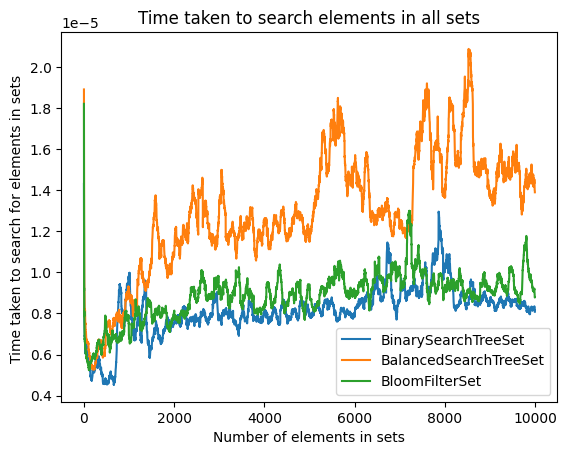

In [ ]:
dataOut = TestDataGenerator().generateData(10_000)
plotSearchCompare(dataOut,sets)

In [ ]:
bfFigure11 = BloomFilterSet()
# bf has m=55 000 and the first four hash functions for this test.
Tbf = TestDataGenerator()

dataInbf = Tbf.generateFixedLenData(5, 10_000)
data_searchbf = Tbf.generateFixedLenData(5, 100)
plotInsertAndAverageSearch(dataInbf, data_searchbf, bfFigure11,
                           "Time taken to insert and search in Bloom Filter")
